In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


### LOADING THE DATASET

In [203]:
data=pd.read_csv('matches.csv')

In [204]:
data

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


### GETTING THE UNIQUE TEAM NAMES

In [170]:
team1_names = data.team1.unique()
team1_names

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [171]:
team2_names=data.team2.unique()
team2_names

array(['Royal Challengers Bangalore', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rajasthan Royals', 'Chennai Super Kings', 'Deccan Chargers',
       'Pune Warriors', 'Kochi Tuskers Kerala', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

### TOTAL MATCHES PLAYED BY THE TEAMS

In [206]:
matches=data.team1.value_counts()+ data.team2.value_counts()
matches

Chennai Super Kings            164
Deccan Chargers                 75
Delhi Capitals                  16
Delhi Daredevils               161
Gujarat Lions                   30
Kings XI Punjab                176
Kochi Tuskers Kerala            14
Kolkata Knight Riders          178
Mumbai Indians                 187
Pune Warriors                   46
Rajasthan Royals               147
Rising Pune Supergiant          16
Rising Pune Supergiants         14
Royal Challengers Bangalore    180
Sunrisers Hyderabad            108
dtype: int64

### VISUALIZATION OF TOTAL WINS BY THE TEAMS

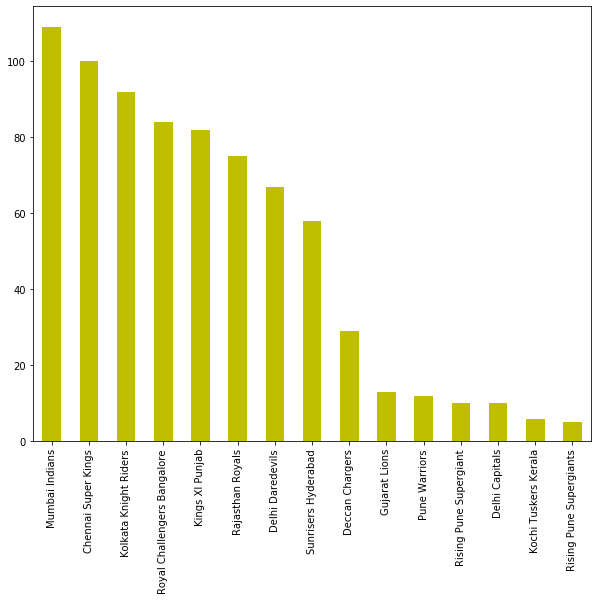

In [214]:
wins=data.winner.value_counts()
wins
plt.figure(figsize=(10,8))
data.winner.value_counts().plot(kind='bar',color='y')

### CALCULATING THE % OF WIN AND CRETING A NEW DATAFRAME FOR GATHERING THE PROCESSED DATA

In [174]:
stats=pd.DataFrame({'total_matches':matches,'Total_Wins':wins,'Total_Loss':matches-wins,'Win%':((wins/matches)*100)})
stats.sort_values(by='Win%', axis=0, ascending=False, inplace=True, kind='quicksort', na_position='last', ignore_index=False)
stats

,total_matches,Total_Wins,Total_Loss,Win%
Delhi Capitals,16,10,6,62.500000
Rising Pune Supergiant,16,10,6,62.500000
Chennai Super Kings,164,100,64,60.975610
Mumbai Indians,187,109,78,58.288770
Sunrisers Hyderabad,108,58,50,53.703704
Kolkata Knight Riders,178,92,86,51.685393
Rajasthan Royals,147,75,72,51.020408
Royal Challengers Bangalore,180,84,96,46.666667
Kings XI Punjab,176,82,94,46.590909
Gujarat Lions,30,13,17,43.333333


### Visualizing the win% of the teams

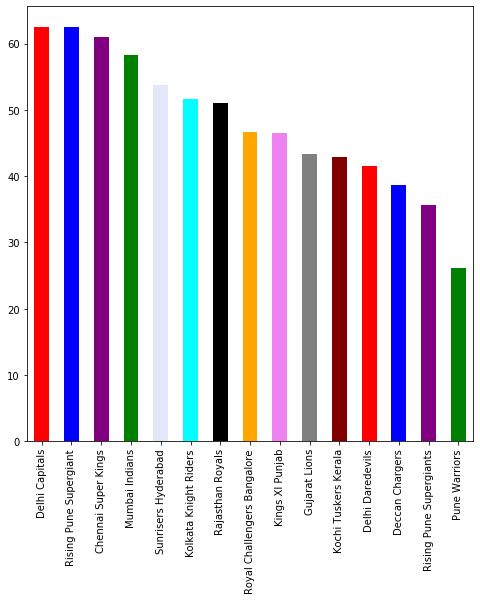

In [208]:
plt.figure(figsize=(8,8))
stats['Win%'].plot(kind='bar',color=['red', 'blue', 'purple', 'green', 'lavender','cyan','black','orange','violet','gray','maroon'])

### CONVERTING THE VALUES OF BAT AND FIELD TO 0 AND 1 FOR VISUALIZATION 

In [176]:
data['toss_decision'].count()
data.replace({"toss_decision":{"bat": 0, "field": 1}},inplace=False)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,1,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,1,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,1,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,1,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,0,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,1,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,0,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,1,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,1,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


### VISUALIZATION OF TOSS DECISION 

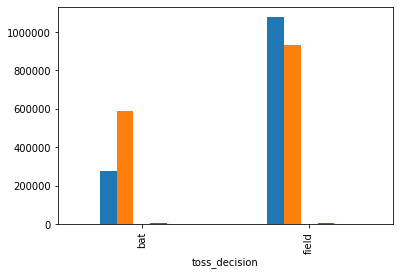

In [178]:
data.groupby('toss_decision').sum().plot(kind='bar',legend=None)

## DATA ABOUT THE PLAYERS WHO HAVE BAGGED MOST OF  MAN OF THE MATCH 

In [179]:
(data['player_of_match'].value_counts()).head(10)

CH Gayle          21
AB de Villiers    20
MS Dhoni          17
DA Warner         17
RG Sharma         17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
V Kohli           12
Name: player_of_match, dtype: int64

### CALCULATING THE WINLOSS % OF THE TEAMS WHEN THEY PLAYED IN THEIR HOME GROUNDS

In [199]:
#Calculating the Winloss for playing in home ground. (WINLOSS-HOME)
home_winner_CSK = len(data[((data.team1 == 'Chennai Super Kings') | (data.team2 == 'Chennai Super Kings')) & ((data.city == 'Chennai') & (data.winner == 'Chennai Super Kings'))])
home_winner_KKR = len(data[((data.team1 == 'Kolkata Knight Riders') | (data.team2 == 'Kolkata Knight Riders')) & ((data.city == 'Kolkata') & (data.winner == 'Kolkata Knight Riders'))])
home_winner_RR = len(data[((data.team1 == 'Rajasthan Royals') | (data.team2 == 'Rajasthan Royals')) & ((data.city == 'Jaipur') & (data.winner == 'Rajasthan Royals'))])
home_winner_MI = len(data[((data.team1 == 'Mumbai Indians') | (data.team2 == 'Mumbai Indians')) & ((data.city == 'Mumbai') & (data.winner == 'Mumbai Indians'))])
home_winner_DC = len(data[((data.team1 == 'Deccan Chargers') | (data.team2 == 'Deccan Chargers')) & ((data.city == 'Hyderabad') & (data.winner == 'Deccan Chargers'))])
home_winner_RCB = len(data[((data.team1 == 'Royal Challengers Bangalore') | (data.team2 == 'Royal Challengers Bangalore')) & ((data.city == 'Bangalore') & (data.winner == 'Royal Challengers Bangalore'))])
home_winner_DD = len(data[((data.team1 == 'Delhi Daredevils') | (data.team2 == 'Delhi Daredevils')) & ((data.city == 'Delhi') & (data.winner == 'Delhi Daredevils'))])
home_winner_KT = len(data[((data.team1 == 'Kochi Tuskers Kerala') | (data.team2 == 'Kochi Tuskers Kerala')) & ((data.city == 'Kochi') & (data.winner == 'Kochi Tuskers Kerala'))])
home_winner_PW = len(data[((data.team1 == 'Pune Warriors') | (data.team2 == 'Pune Warriors')) & ((data.city == 'Pune') & (data.winner == 'Pune Warriors'))])
home_winner_SH = len(data[((data.team1 == 'Sunrisers Hyderabad') | (data.team2 == 'Sunrisers Hyderabad')) & ((data.city == 'Hyderabad') & (data.winner == 'Sunrisers Hyderabad'))])
home_winner_GL = len(data[((data.team1 == 'Gujarat Lions') | (data.team2 == 'Gujarat Lions')) & ((data.city == 'Rajkot') & (data.winner == 'Gujarat Lions'))])
home_winner_RPS = len(data[((data.team1 == 'Rising Pune Supergiants') | (data.team2 == 'Rising Pune Supergiants')) & ((data.city == 'Pune') & (data.winner == 'Rising Pune Supergiants'))])
home_winner_KXP = len(data[((data.team1 == 'Kings XI Punjab') | (data.team2 == 'Kings XI Punjab')) & ((data.city == 'Chandigarh') & (data.winner == 'Kings XI Punjab'))])


total_matches_played_CSK = len(data[((data.team1 == 'Chennai Super Kings') | (data.team2 == 'Chennai Super Kings')) & (data.city == 'Chennai')])
total_matches_played_KKR = len(data[((data.team1 == 'Kolkata Knight Riders') | (data.team2 == 'Kolkata Knight Riders')) & (data.city == 'Kolkata')])
total_matches_played_RR = len(data[((data.team1 == 'Rajasthan Royals') | (data.team2 == 'Rajasthan Royals')) & (data.city == 'Jaipur')])
total_matches_played_MI = len(data[((data.team1 == 'Mumbai Indians') | (data.team2 == 'Mumbai Indians')) & (data.city == 'Mumbai')])
total_matches_played_DC = len(data[((data.team1 == 'Deccan Chargers') | (data.team2 == 'Deccan Chargers')) & (data.city == 'Hyderabad')])
total_matches_played_RCB = len(data[((data.team1 == 'Royal Challengers Bangalore') | (data.team2 == 'Royal Challengers Bangalore')) & (data.city == 'Bangalore')])
total_matches_played_DD = len(data[((data.team1 == 'Delhi Daredevils') | (data.team2 == 'Delhi Daredevils')) & (data.city == 'Delhi')])
total_matches_played_KT = len(data[((data.team1 == 'Kochi Tuskers Kerala') | (data.team2 == 'Kochi Tuskers Kerala')) & (data.city == 'Kochi')])
total_matches_played_PW = len(data[((data.team1 == 'Pune Warriors') | (data.team2 == 'Pune Warriors')) & (data.city == 'Pune')])
total_matches_played_SH = len(data[((data.team1 == 'Sunrisers Hyderabad') | (data.team2 == 'Sunrisers Hyderabad')) & (data.city == 'Hyderabad')])
total_matches_played_GL = len(data[((data.team1 == 'Gujarat Lions') | (data.team2 == 'Gujarat Lions')) & (data.city == 'Rajkot')])
total_matches_played_RPS = len(data[((data.team1 == 'Rising Pune Supergiants') | (data.team2 == 'Rising Pune Supergiants')) & (data.city == 'Pune')])
total_matches_played_KXP = len(data[((data.team1 == 'Kings XI Punjab') | (data.team2 == 'Kings XI Punjab')) & (data.city == 'Chandigarh')])

winloss_home_CSK = (home_winner_CSK / total_matches_played_CSK)*100
winloss_home_KKR = (home_winner_KKR / total_matches_played_KKR)*100
winloss_home_RR = (home_winner_RR / total_matches_played_RR)*100
winloss_home_MI = (home_winner_MI / total_matches_played_MI)*100
winloss_home_DC = (home_winner_DC / total_matches_played_DC)*100
winloss_home_RCB =(home_winner_RCB / total_matches_played_RCB)*100
winloss_home_DD = (home_winner_DD / total_matches_played_DD)*100
winloss_home_KT = (home_winner_KT / total_matches_played_KT)*100
winloss_home_PW = (home_winner_PW / total_matches_played_PW)*100
winloss_home_SH = (home_winner_SH / total_matches_played_SH)*100
winloss_home_GL = (home_winner_GL / total_matches_played_GL)*100
winloss_home_RPS =(home_winner_RPS / total_matches_played_RPS)*100
winloss_home_KXP =(home_winner_KXP / total_matches_played_KXP)*100

winlossHome=pd.Series([winloss_home_CSK,winloss_home_DC,winloss_home_DD,winloss_home_GL,winloss_home_KXP,winloss_home_KT,winloss_home_KKR,winloss_home_MI,winloss_home_PW,winloss_home_RR,winloss_home_RPS,winloss_home_RCB,winloss_home_SH],index=['Chennai Super Kings','Deccan Chargers','Delhi Daredevils','Gujarat Lions','Kings XI Punjab','Kochi Tuskers Kerala','Kolkata Knight Riders','Mumbai Indians','Pune Warriors','Rajasthan Royals','Rising Pune Supergiants','Royal Challengers Bangalore','Sunrisers Hyderabad'])



### FINAL BRIEF DESCRIPTION OF TEAMS AND THEIR PERFORMANCES

In [200]:
stats=pd.DataFrame({'total_matches':matches,'Total_Wins':wins,'Total_Loss':matches-wins,'WinlossHome':winlossHome,'Win%':((wins/matches)*100)})
stats.sort_values(by='Win%', axis=0, ascending=False, inplace=True, kind='quicksort', na_position='last', ignore_index=False)
stats
stats.replace(np.nan,0)

,total_matches,Total_Wins,Total_Loss,WinlossHome,Win%
Delhi Capitals,16,10,6,0.000000,62.500000
Rising Pune Supergiant,16,10,6,0.000000,62.500000
Chennai Super Kings,164,100,64,71.428571,60.975610
Mumbai Indians,187,109,78,64.634146,58.288770
Sunrisers Hyderabad,108,58,50,68.181818,53.703704
Kolkata Knight Riders,178,92,86,60.810811,51.685393
Rajasthan Royals,147,75,72,68.085106,51.020408
Royal Challengers Bangalore,180,84,96,48.387097,46.666667
Kings XI Punjab,176,82,94,47.826087,46.590909
Gujarat Lions,30,13,17,30.000000,43.333333
